<a href="https://colab.research.google.com/github/ankitmathur45/Python/blob/master/logistic_regression_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression from scratch

In [1]:
!pip3 install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from random import random
from copy import deepcopy
from math import exp, log, sqrt
from pathlib import Path
from matplotlib import pyplot as plt
from typing import List

In [3]:
!mkdir -p data

In [4]:
data_dir: Path = Path('data')

In [5]:
!wget -nc -P data https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/5b2d8a71984016ae021094641a3815d6ea9ac527/LogisticRegression/data/marks.txt

--2023-01-01 17:05:26--  https://raw.githubusercontent.com/animesh-agarwal/Machine-Learning/5b2d8a71984016ae021094641a3815d6ea9ac527/LogisticRegression/data/marks.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘data/marks.txt’

marks.txt           100%[===================>]   3.69K  --.-KB/s    in 0s      

2023-01-01 17:05:26 (46.8 MB/s) - ‘data/marks.txt’ saved [3775/3775]



In [6]:
!head -n 20 data/marks.txt

34.62365962451697,78.0246928153624,0
30.28671076822607,43.89499752400101,0
35.84740876993872,72.90219802708364,0
60.18259938620976,86.30855209546826,1
79.0327360507101,75.3443764369103,1
45.08327747668339,56.3163717815305,0
61.10666453684766,96.51142588489624,1
75.02474556738889,46.55401354116538,1
76.09878670226257,87.42056971926803,1
84.43281996120035,43.53339331072109,1
95.86155507093572,38.22527805795094,0
75.01365838958247,30.60326323428011,0
82.30705337399482,76.48196330235604,1
69.36458875970939,97.71869196188608,1
39.53833914367223,76.03681085115882,0
53.9710521485623,89.20735013750205,1
69.07014406283025,52.74046973016765,1
67.94685547711617,46.67857410673128,0
70.66150955499435,92.92713789364831,1
76.97878372747498,47.57596364975532,1


In [7]:
marks_data_path: Path = data_dir/ 'marks.txt'

In [8]:
# Turn data into a list of x vectors and a vector with all y 
xs : List[List[float]] = []
ys : List[float] = []

with open(marks_data_path) as file:
  for line in file:
    data_point : List[str] = line.strip().split(',')
    x1 : float = float(data_point[0])
    x2 : float = float(data_point[1])
    y : int = int(data_point[2])
    xs.append([x1, x2])
    ys.append(y)

(30.05882244669796, 99.82785779692128, 30.60326323428011, 98.86943574220611)

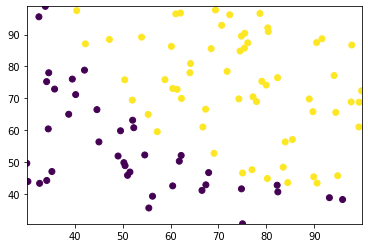

In [9]:
#Create a scatter plot, color is determined by y
x1s : List[float] = [x[0] for x in xs]
x2s : List[float] = [x[1] for x in xs]

plt.scatter(x1s, x2s, c=ys)
plt.axis([min(x1s), max(x1s), min(x2s), max(x2s)])

In [10]:
for x in xs:
  x.insert(0,1)

xs[:5]

[[1, 34.62365962451697, 78.0246928153624],
 [1, 30.28671076822607, 43.89499752400101],
 [1, 35.84740876993872, 72.90219802708364],
 [1, 60.18259938620976, 86.30855209546826],
 [1, 79.0327360507101, 75.3443764369103]]

In [11]:
#Rescale the data, mean = 0, std dev = 1

def z_score(data: List[List[float]]) -> List[List[float]]:
  def mean(data: List[float]) -> float:
    return sum(data)/ len(data)

  def standard_deviation(data: List[float]) -> float:
    num_items: int = len(data)
    mu : float = mean(data)
    return sqrt(1/(num_items - 1) * sum([(item - mu) ** 2 for item in data]))

  data_copy: List[List[float]] = deepcopy(data)
  data_transposed = list(zip(*data_copy))
  mus: List[float] = []
  stds: List[float] = []

  for item in data_transposed:
    mus.append(mean(list(item)))
    stds.append(standard_deviation(list(item)))

  for item in data_copy:
    mu: float = mean(item)
    std: float = standard_deviation(item)
    for i, elem in enumerate(item):
      if stds[i] > 0.0:
        item[i] = (elem - mus[i]) / stds[i]

  return data_copy
  

In [12]:
xs = z_score(xs)
xs[:5]

[[1, -1.5942162646576388, 0.6351413941754435],
 [1, -1.8171014180340745, -1.2014885239142388],
 [1, -1.531325157335502, 0.3594832875590465],
 [1, -0.28068723821760927, 1.0809228071415948],
 [1, 0.6880619310375534, 0.4909048515228952]]

In [13]:
#Sigmoid function

def sigmoid(x: float) -> float:
  return 1 / (1 + exp(-x))

assert sigmoid(0) == 0.5

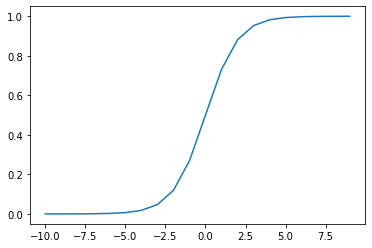

In [14]:
xs_sigmoid: List[float] = [x for x in range(-10, 10)]
ys_sigmoid: List[float] = [sigmoid(x) for x in xs_sigmoid]

plt.plot(xs_sigmoid, ys_sigmoid)

In [17]:
#calculating dot product
def dot(a: List[float], b: List[float]) -> float:
  assert len(a) == len(b)
  return sum([a_i * b_i for a_i, b_i in zip(a,b)])

assert dot([1,2,3,4], [5,6,7,8]) == 70

In [18]:
def squish(beta: List[float], x: List[float]) -> float:
  assert len(beta) == len(x)
  dot_result : float = dot(beta,x)
  return sigmoid(dot_result)

assert squish([1,2,3,4], [5,6,7,8]) == 1.0

In [19]:
#Negative log likelihood
def neg_log_likelihood(y: float, y_pred: float) -> float:
  return -((y * log(y_pred)) + ((1-y) * log(1- y_pred)))

assert 2.30 < neg_log_likelihood(1,0.1) < 2.31

Text(0.5, 1.0, 'y=0')

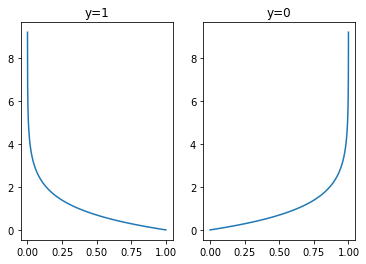

In [20]:
xs_nll: List[float] = [x / 10000 for x in range(1, 10000)]

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(xs_nll, [neg_log_likelihood(1,x) for x in xs_nll])
ax1.set_title('y=1')
ax2.plot(xs_nll, [neg_log_likelihood(0,x) for x in xs_nll])
ax2.set_title('y=0')

In [23]:
def error (ys: List[float], ys_pred: List[float]) -> float:
  assert len(ys) == len(ys_pred)
  num_items: int = len(ys)
  sum_nll: float = sum([neg_log_likelihood(y,y_pred) for y, y_pred in zip(ys, ys_pred)])
  return (1/num_items) * sum_nll

In [24]:
beta: List[float] = [random() / 10 for _ in range(3)]
print (f'Starting with beta: {beta}')

epochs: int = 5000
learning_rate: float = 0.01

for epoch in range(epochs):
  ys_pred : List[float] = [squish(beta, x) for x in xs]

  if epoch % 1000 == True:
    loss: float = error(ys, ys_pred)
    print(f'Epoch {epoch} --> loss: {loss}')

  grad: List[float] = [0 for _ in range(len(beta))]
  for x, y in zip(xs, ys):
    err: float = squish(beta, x) - y
    for i, x_i in enumerate(x):
      grad[i] += (err * x_i)
  grad = [1/ len(x) * g_i for g_i in grad]

  beta = [b + (gb * - learning_rate) for b, gb in zip(beta, grad)]

print (f'Best estimate for beta : {beta}')


Starting with beta: [0.029995411557479888, 0.08173173254646472, 0.05607499043009081]
Epoch 1 --> loss: 0.6123295311738874
Epoch 1001 --> loss: 0.20374339896495475
Epoch 2001 --> loss: 0.20350231079877898
Epoch 3001 --> loss: 0.20349779977056262
Epoch 4001 --> loss: 0.20349770371750564
Best estimate for beta : [1.7184091225650198, 4.012815824467315, 3.7438191536967658]


In [25]:
# compute statistics

total: int = len(ys)
thresh: float = 0.5
tp: int = 0
tn: int = 0
fp: int = 0
fn: int = 0

for i, x in enumerate(xs):
  y: int = ys[i]
  pred: float = squish(beta, x)
  y_pred: int = 1
  if pred< thresh:
    y_pred = 0

  if y == 1 and y_pred == 1:
    tp += 1
  elif y == 0 and y_pred == 0:
    tn += 1
  elif y== 1 and y_pred == 0:
    fn += 1
  elif y == 0 and y_pred == 1:
    fp += 1

print (f'TP: {tp}')
print (f'TN: {tn}')
print (f'FP: {fp}')
print (f'FN: {fn}')
print (f'Accuracy : {(tp + tn )/ total}')
print (f'Error rate: {(fp + fn)/ total}')

TP: 55
TN: 34
FP: 6
FN: 5
Accuracy : 0.89
Error rate: 0.11


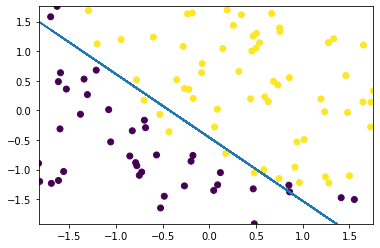

In [27]:
x1s: List[float] = [x[1] for x in xs]
x2s: List[float] = [x[2] for x in xs]
plt.scatter(x1s, x2s, c=ys)
plt.axis([min(x1s), max(x1s), min(x2s), max(x2s)])

m: float = -(beta[1]/ beta[2])
b: float = -(beta[0]/ beta[2])

x2s: List[float] = [m * x[1] + b for x in xs]
plt.plot(x1s, x2s, '--')